# Coursera - Applied Data Science Capstone
## Week 4
### The Battle of Neighborhoods

This notebook is part of the assignment of Week 4 of the Applied Data Science Capstone course on Coursera. 

### Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li>Introduction</li>
    <li>Data</li>
    <li>Methodology</li>
    <li>Discussion</li>
    <li>Conclusions</li>
</ol>
    
</div>
 
<hr>

### <b>1. Introduction</b>

Universities in the UK are among the best worldwide - attracting thousands of students from around the globe per year. Major focus is usually given to bigger and more well-known cities like London, Cambridge or Oxford (Figure 1). 

<img src="UniRanking.PNG" width=1000/>


<center>Figure 1. University League Table 2020 <a href=https://www.thecompleteuniversityguide.co.uk/league-tables/rankings>[1]</a></center> </br>


But what about other parts of the UK? One region for studying among some of the top universities, is the East Midlands, which is one of the nine official regions of England in the eastern part of central England. It comprises the counties of Derbyshire, Leicestershire, Rutland, Nottinghamshire, Lincolnshire and Northamptonshire and is home to the beautiful Peak District <a href=https://en.wikivoyage.org/wiki/East_Midlands>[2]</a>.


Having experienced and currently still experiencing university life abroad and here in the UK, the focus of this project will be on providing students in the East Midlands some additional information for their life at university. While there are many things to consider when it comes to beginning your studies, one important aspect is the housing situation. For many, it is the first time living away from home, having to take responsibility for paying bills, etc. As such, we will be looking at places to rent, concentrating on the city of Nottingham. In addition, we will investigate other aspects that might be important for students when thinking about the location of their accommodation, such as entertainment, proximity to university, and public transport. 

### <b>2. Data</b>

For this project, we will require data about the available properties for rent in Nottingham, geo location data, and information about nearby things to do. Thus, we will use datasets from the following sources:

1. Data from <a href=https://www.zoopla.co.uk/ rel="nofollow" >Zoopla</a>. Zoopla is one of the UK's largest online real estate portals, where one can find properties for rent and sale. Easy access to these data for further processing are provided through their very own <a href=https://developer.zoopla.co.uk/ rel="nofollow" >Zoopla API</a>. We use the python wrapper <a href=https://pypi.org/project/zoopla/ >zoopla</a> as it facilitates working with the API. One limitation that is to note here, is that the Zoopla API limits the size for each page of results to a 100. To have a better working dataset, the API call was repeated a few times for different result pages.

2. To plot the properties in their appropriate districts, the <a href='https://www.opendatanottingham.org.uk/dataset.aspx?id=160' >data</a> for the electoral ward boundaries from 2019 for Nottingham City have downloaded as a json file and used in conjunction with a folium map. 

3. Using the <a href='https://developer.foursquare.com/' >Foursquare City Guide Developer API</a> provides us with things to do in Nottingham, such as a list of places to eat, shop and visit.

#### <b>2.1 Load Dependencies</b>

In [1]:
%%capture

import pandas as pd
import numpy as np
!pip install lxml html5lib beautifulsoup4
!pip install seaborn
import seaborn as sns
!pip install zoopla
from zoopla import Zoopla
from json import JSONDecoder
from scipy import stats
import folium
import requests
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline 

print('Libraries imported.')

#### <b>2.2 Scrape required Zoopla Data from Website</b>

In [2]:
# read API key from file
with open("zooplaAuthentication.txt","r") as output:
    lines=output.readlines()

In [3]:
# make call to Zoopla API
zoopla = Zoopla(api_key=lines[0])

search_res = zoopla.property_listings({
    'page_size': 100,
    'page_number': 1,
    'listing_status': 'rent',
    'area': 'Nottingham',
    'summarised': 'yes',
    'radius': 0.1,
    'new_homes': 'no'
})

search_res2 = zoopla.property_listings({
    'page_size': 100,
    'page_number': 2,
    'listing_status': 'rent',
    'area': 'Nottingham',
    'summarised': 'yes',
    'radius': 0.1,
    'new_homes': 'no'
})

search_res3 = zoopla.property_listings({
    'page_size': 100,
    'page_number': 3,
    'listing_status': 'rent',
    'area': 'Nottingham',
    'summarised': 'yes',
    'radius': 0.1,
    'new_homes': 'no'
})

search_res4 = zoopla.property_listings({
    'page_size': 100,
    'page_number': 4,
    'listing_status': 'rent',
    'area': 'Nottingham',
    'summarised': 'yes',
    'radius': 0.1,
    'new_homes': 'no'
})

search_res5 = zoopla.property_listings({
    'page_size': 100,
    'page_number': 5,
    'listing_status': 'rent',
    'area': 'Nottingham',
    'summarised': 'yes',
    'radius': 0.1,
    'new_homes': 'no'
})

In [4]:
search_res.keys()

dict_keys(['street', 'listing', 'postcode', 'result_count', 'county', 'bounding_box', 'area_name', 'town', 'country'])

In [5]:
search_res.listing

[{'num_bedrooms': 8,
  'country_code': 'gb',
  'street_name': 'Byard Lane',
  'last_published_date': datetime.datetime(2020, 1, 31, 10, 44, 53),
  'price_modifier': None,
  'num_bathrooms': 8,
  'image_url': 'https://lid.zoocdn.com/354/255/15ba8bfa0fb686ba2fd7ae570f8088252a603b46.jpg',
  'agent_name': 'FHP Living',
  'county': 'Nottingham',
  'latitude': 52.95212,
  'details_url': 'https://www.zoopla.co.uk/to-rent/details/53634478?utm_source=v1:obCeSz_cWwPKqx34cbp9sGP6IkBowqnc&utm_medium=api',
  'property_type': 'Flat',
  'floor_plan': None,
  'post_town': 'Nottingham',
  'description': 'Student Property Now Booking for 20/21 Style, Space and Location with this leading 8 bedroom apartment with en-suites in each room £165 pp pw fully inc bills, internet, contents insurance and end of tenancy clean Stunning Property - Call now to avoid ...',
  'listing_id': '53634478',
  'displayable_address': 'Byard Lane, Nottingham NG1',
  'listing_status': 'rent',
  'agent_logo': 'https://st.zoocdn.co

In [6]:
num_bedrooms = []
street_name = []
num_bathrooms = []
latitude = []
longitude = []
county = []
price = []
category = []
outcode = []
post_town = []
property_type = []

for l in search_res.listing:
    num_bedrooms.append(l.num_bedrooms)
    street_name.append(l.street_name)
    num_bathrooms.append(l.num_bathrooms)
    latitude.append(l.latitude)
    longitude.append(l.longitude)
    county.append(l.county)
    price.append(l.price)
    category.append(l.category)
    outcode.append(l.outcode)
    property_type.append(l.property_type)
    post_town.append(l.post_town)

for l in search_res2.listing:
    num_bedrooms.append(l.num_bedrooms)
    street_name.append(l.street_name)
    num_bathrooms.append(l.num_bathrooms)
    latitude.append(l.latitude)
    longitude.append(l.longitude)
    county.append(l.county)
    price.append(l.price)
    category.append(l.category)
    outcode.append(l.outcode)
    property_type.append(l.property_type)
    post_town.append(l.post_town)
    
for l in search_res3.listing:
    num_bedrooms.append(l.num_bedrooms)
    street_name.append(l.street_name)
    num_bathrooms.append(l.num_bathrooms)
    latitude.append(l.latitude)
    longitude.append(l.longitude)
    county.append(l.county)
    price.append(l.price)
    category.append(l.category)
    outcode.append(l.outcode)
    property_type.append(l.property_type)
    post_town.append(l.post_town)
    
for l in search_res4.listing:
    num_bedrooms.append(l.num_bedrooms)
    street_name.append(l.street_name)
    num_bathrooms.append(l.num_bathrooms)
    latitude.append(l.latitude)
    longitude.append(l.longitude)
    county.append(l.county)
    price.append(l.price)
    category.append(l.category)
    outcode.append(l.outcode)
    property_type.append(l.property_type)
    post_town.append(l.post_town)
    
for l in search_res5.listing:
    num_bedrooms.append(l.num_bedrooms)
    street_name.append(l.street_name)
    num_bathrooms.append(l.num_bathrooms)
    latitude.append(l.latitude)
    longitude.append(l.longitude)
    county.append(l.county)
    price.append(l.price)
    category.append(l.category)
    outcode.append(l.outcode)
    property_type.append(l.property_type)
    post_town.append(l.post_town)
    
# dictionary of lists  
dict = {'num_bedrooms': num_bedrooms, 'num_bathrooms': num_bathrooms, 'price': price, 'property_type': property_type, 'category': category, 'street_name': street_name, 'county': county, 
        'post_town': post_town, 'outcode': outcode, 'latitude': latitude, 'longitude': longitude}  
    
df_properties = pd.DataFrame(dict) 

In [7]:
df_properties.head()

,num_bedrooms,num_bathrooms,price,property_type,category,street_name,county,post_town,outcode,latitude,longitude
0,8,8,1320.0,Flat,Residential,Byard Lane,Nottingham,Nottingham,NG1,52.952120,-1.146667
1,1,1,1175.0,Detached house,Residential,Watson avenue,Nottingham,Nottingham,NG3,52.961685,-1.112865
2,5,3,1154.0,Detached house,Residential,,Nottingham,Nottingham,NG9,52.939785,-1.220182
3,8,8,1112.0,Flat,Residential,Maid Marian Way,Nottingham,Nottingham,NG1,52.950990,-1.151675
4,8,3,1080.0,Terraced house,Residential,,Nottingham,Nottingham,NG1,52.964428,-1.152991


In [8]:
df_properties.shape

(500, 11)

In [9]:
df_properties.to_csv('df_properties.csv')

##### Now that we have collected the data we need, let's take a closer look at them in the next section. 

### <b>3. Methodology</b>

<b>Analyse Data</b>

##### Let's have a look at the data we collected. For this, we will inspect the data and run some statistical analysis to better understand what we further need to do.

In [10]:
df = df_properties

##### First, we will print the top 15 rows

In [11]:
df.head(15)

,num_bedrooms,num_bathrooms,price,property_type,category,street_name,county,post_town,outcode,latitude,longitude
0,8,8,1320.0,Flat,Residential,Byard Lane,Nottingham,Nottingham,NG1,52.952120,-1.146667
1,1,1,1175.0,Detached house,Residential,Watson avenue,Nottingham,Nottingham,NG3,52.961685,-1.112865
2,5,3,1154.0,Detached house,Residential,,Nottingham,Nottingham,NG9,52.939785,-1.220182
3,8,8,1112.0,Flat,Residential,Maid Marian Way,Nottingham,Nottingham,NG1,52.950990,-1.151675
4,8,3,1080.0,Terraced house,Residential,,Nottingham,Nottingham,NG1,52.964428,-1.152991
5,8,3,1080.0,Terraced house,Residential,,Nottingham,Nottingham,NG1,52.964428,-1.152991
6,8,3,1080.0,Terraced house,Residential,,Nottingham,Nottingham,NG1,52.964428,-1.152991
7,8,8,1080.0,Flat,Residential,Middle Street,Nottingham,Nottingham,NG9,52.924560,-1.213565
8,7,7,945.0,Flat,Residential,Middle Street,Nottingham,Nottingham,NG9,52.924560,-1.213565
9,8,2,920.0,Terraced house,Residential,Wellington Square Lenton,Nottingham,Nottingham,NG7,52.955970,-1.166062


##### The data seem well organised at first glance. We can, however, see that a few values in the ‘street_name’ are missing, which we will have to attend to later. Additionally, inconsistent upper and lowercase spelling in the 'street_names' can be identified. 'County' and 'post_town' seem to be containing the same values, which seems to be in this case redundant. The column 'category' should also be checked for the same reason.

In [12]:
df['county'].value_counts()

Nottingham    495
Name: county, dtype: int64

In [13]:
df['post_town'].value_counts()

Nottingham    495
Name: post_town, dtype: int64

In [14]:
df['category'].value_counts()

Residential    500
Name: category, dtype: int64

##### In our case, 'category' doesn't add any value. Neither does keeping both of the other columns. We shall get rid of them.

In [15]:
# drop cols 'county' and 'category'
df.drop(labels=['county'], axis=1, inplace=True)
df.drop(labels=['category'], axis=1, inplace=True)

df.shape

(500, 9)

##### Then, we'll inspect the dtypes.

In [16]:
df.dtypes

num_bedrooms       int64
num_bathrooms      int64
price            float64
property_type     object
street_name       object
post_town         object
outcode           object
latitude         float64
longitude        float64
dtype: object

##### As expected. Good start.

##### Next, .describe()

In [17]:
df.describe()

,num_bedrooms,num_bathrooms,price,latitude,longitude
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.644000,1.494000,309.120000,52.951298,-1.162814
std,1.695587,1.017859,174.297587,0.025624,0.045662
min,0.000000,0.000000,190.000000,52.882960,-1.323377
25%,2.000000,1.000000,208.000000,52.941808,-1.178057
50%,2.000000,1.000000,240.000000,52.951930,-1.156460
75%,4.000000,2.000000,323.000000,52.956123,-1.144890
max,8.000000,8.000000,1320.000000,53.098846,-0.793944


##### First impression seems to show that the majority of rented properties are 2-3 bedrooms with 1-2 bathrooms for a price of approximately 309 GBP per month.

##### What about missing values?

In [18]:
df = df.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)

In [19]:
missing_val = df.isna()

for column in missing_val.columns.values.tolist():
    print(column)
    print (missing_val[column].value_counts())
    print("")    

num_bedrooms
False    500
Name: num_bedrooms, dtype: int64

num_bathrooms
False    500
Name: num_bathrooms, dtype: int64

price
False    500
Name: price, dtype: int64

property_type
False    489
True      11
Name: property_type, dtype: int64

street_name
False    448
True      52
Name: street_name, dtype: int64

post_town
False    495
True       5
Name: post_town, dtype: int64

outcode
False    500
Name: outcode, dtype: int64

latitude
False    500
Name: latitude, dtype: int64

longitude
False    500
Name: longitude, dtype: int64



##### As we can see above, we have a few missing values:

- 5x in county, post_town
- 11x in property_type
- 52x in street_name

##### As we have the latitude and longitude values, we will keep the missing county, post_town and street_name data as we can treat these information as more detailed information. However, the rows containing missing property_type data will be dropped as we don't have another way of properly ensuring the right value. 

<b>Data Pre-processing</b>

In [20]:
# drop whole row containing NaN in "property_type" column
df.dropna(subset=["property_type"], axis=0, inplace=True)

# reset index, because we dropped rows
df.reset_index(drop=True, inplace=True)

In [21]:
df.shape

(489, 9)

In [22]:
# uppercase for street_names
df['street_name'] = df['street_name'].str.upper() 

In [23]:
df.head()

,num_bedrooms,num_bathrooms,price,property_type,street_name,post_town,outcode,latitude,longitude
0,8,8,1320.0,Flat,BYARD LANE,Nottingham,NG1,52.952120,-1.146667
1,1,1,1175.0,Detached house,WATSON AVENUE,Nottingham,NG3,52.961685,-1.112865
2,5,3,1154.0,Detached house,NaN,Nottingham,NG9,52.939785,-1.220182
3,8,8,1112.0,Flat,MAID MARIAN WAY,Nottingham,NG1,52.950990,-1.151675
4,8,3,1080.0,Terraced house,NaN,Nottingham,NG1,52.964428,-1.152991


<b>Visualisation</b>

##### Let us first plot all the properties that we gathered from Zoopla in a python folium map. To outline the city of Nottingham with its counties, a json data containing the boundaries was downloaded from the Nottingham Council website and referenced here.

In [24]:
world_geo = r'ncc_NottinghamCityWards_May2019.json'

latitude = df.latitude.mean()
longitude = df.longitude.mean()

#threshold_scale = np.linspace(df_polInc_count['Count'].min(), df_polInc_count['Count'].max(), 6, dtype=int)

notts_map = folium.Map(location=[latitude,longitude], zoom_start = 12)

notts_map.choropleth(
    geo_data = world_geo,
    data = df,
    columns = ['outcode', 'price'],
    key_on = 'feature.properties.NAME',
    fill_color = 'YlOrRd', 
    fill_opacity  =0.7, 
    line_opacity = 0.2,
    legend_name = ' ',
    reset = True
)

for index, row in df.iterrows():
    folium.CircleMarker([df['latitude'][index], df['longitude'][index]], radius=3, fill_color='blue').add_to(notts_map)

notts_map

##### Foursquare

##### Now let us explore the Foursquare API and apply it to Nottingham city.

In [25]:
# read API key from file
with open("foursquareAuthentication.txt","r") as output:
    linesFour=output.readlines()

In [26]:
CLIENT_ID = linesFour[0]
CLIENT_SECRET = linesFour[1] # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

latitude = df.latitude.mean()
longitude = df.longitude.mean()
radius = 5000

# define the corresponding URL to explore location
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

In [27]:
# send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee34f377d583140729a4f3b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Nottingham',
  'headerFullLocation': 'Nottingham',
  'headerLocationGranularity': 'city',
  'totalResults': 234,
  'suggestedBounds': {'ne': {'lat': 52.99623017792438,
    'lng': -1.088388854982498},
   'sw': {'lat': 52.90623008792429, 'lng': -1.2374890288620828}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc9e8bcfb84c9b668dd1b3e',
       'name': "Aubrey's Traditional Creperie",
       'location': {'address': '14-16 Westend Arcade',
        'crossStreet': 'Long Row',
        'lat': 52.95426242827112,
        'lng': -1.1532410721145216,
        'labeledLatLngs': [{

In [28]:
results['response']['groups']

[{'type': 'Recommended Places',
  'name': 'recommended',
  'items': [{'reasons': {'count': 0,
     'items': [{'summary': 'This spot is popular',
       'type': 'general',
       'reasonName': 'globalInteractionReason'}]},
    'venue': {'id': '4bc9e8bcfb84c9b668dd1b3e',
     'name': "Aubrey's Traditional Creperie",
     'location': {'address': '14-16 Westend Arcade',
      'crossStreet': 'Long Row',
      'lat': 52.95426242827112,
      'lng': -1.1532410721145216,
      'labeledLatLngs': [{'label': 'display',
        'lat': 52.95426242827112,
        'lng': -1.1532410721145216}],
      'distance': 732,
      'postalCode': 'NG1 6JP',
      'cc': 'GB',
      'city': 'Nottingham',
      'state': 'Nottinghamshire',
      'country': 'United Kingdom',
      'formattedAddress': ['14-16 Westend Arcade (Long Row)',
       'Nottingham',
       'Nottinghamshire',
       'NG1 6JP',
       'United Kingdom']},
     'categories': [{'id': '52e81612bcbc57f1066b79f2',
       'name': 'Creperie',
       'p

In [29]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4bc9e8bcfb84c9b668dd1b3e',
  'name': "Aubrey's Traditional Creperie",
  'location': {'address': '14-16 Westend Arcade',
   'crossStreet': 'Long Row',
   'lat': 52.95426242827112,
   'lng': -1.1532410721145216,
   'labeledLatLngs': [{'label': 'display',
     'lat': 52.95426242827112,
     'lng': -1.1532410721145216}],
   'distance': 732,
   'postalCode': 'NG1 6JP',
   'cc': 'GB',
   'city': 'Nottingham',
   'state': 'Nottinghamshire',
   'country': 'United Kingdom',
   'formattedAddress': ['14-16 Westend Arcade (Long Row)',
    'Nottingham',
    'Nottinghamshire',
    'NG1 6JP',
    'United Kingdom']},
  'categories': [{'id': '52e81612bcbc57f1066b79f2',
    'name': 'Creperie',
    'pluralName': 'Creperies',
    'shortName': 'Creperie',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/creperie_',
     'suffix'

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Aubrey's Traditional Creperie,Creperie,14-16 Westend Arcade,Long Row,52.954262,-1.153241,"[{'label': 'display', 'lat': 52.95426242827112...",732,NG1 6JP,GB,Nottingham,Nottinghamshire,United Kingdom,"[14-16 Westend Arcade (Long Row), Nottingham, ...",NaN,4bc9e8bcfb84c9b668dd1b3e
1,Page 45,Bookstore,9 Market St,NaN,52.954104,-1.151368,"[{'label': 'display', 'lat': 52.95410360675537...",839,NG1 6HY,GB,Nottingham,Nottinghamshire,United Kingdom,"[9 Market St, Nottingham, Nottinghamshire, NG1...",NaN,4b588c9af964a520685d28e3
2,The Sir John Borlase Warren,Pub,1 Ilkeston Road,Canning Circus,52.955775,-1.162164,"[{'label': 'display', 'lat': 52.95577509229471...",508,NG7 3GD,GB,Nottingham,Nottinghamshire,United Kingdom,"[1 Ilkeston Road (Canning Circus), Nottingham,...",NaN,538f1169498e9e17bc7bd2e3
3,Memsaab Restaurant,Indian Restaurant,12-14 Maid Marian Way,NaN,52.952795,-1.153766,"[{'label': 'display', 'lat': 52.95279493269992...",639,NG1 6HS,GB,Nottingham,Nottinghamshire,United Kingdom,"[12-14 Maid Marian Way, Nottingham, Nottingham...",NaN,4be85805ee96c9283ef9fdbf
4,Malt Cross,Bar,St James's Street,NaN,52.953068,-1.152378,"[{'label': 'display', 'lat': 52.953068, 'lng':...",737,NG1 6FG,GB,Nottingham,Nottinghamshire,United Kingdom,"[St James's Street, Nottingham, Nottinghamshir...",NaN,54514d19498e1bb54bc03834
5,200 Degrees Coffee,Coffee Shop,Flying Horse Walk,NaN,52.953184,-1.148888,"[{'label': 'display', 'lat': 52.9531840289857,...",967,NaN,GB,Nottingham,Nottinghamshire,United Kingdom,"[Flying Horse Walk, Nottingham, Nottinghamshir...",NaN,5448b19b498ec638a8a752da
6,World Service,Restaurant,Newdigate House,Castle Gate,52.950793,-1.152312,"[{'label': 'display', 'lat': 52.95079326205495...",714,NG1 6AF,GB,Nottingham,Nottinghamshire,United Kingdom,"[Newdigate House (Castle Gate), Nottingham, No...",NaN,4c4c3caf46240f473d507ff4
7,The Organ Grinder,Pub,21 Alfreton Rd,NaN,52.956491,-1.162756,"[{'label': 'display', 'lat': 52.95649058446947...",585,NG7 3JE,GB,Nottingham,Nottinghamshire,United Kingdom,"[21 Alfreton Rd, Nottingham, Nottinghamshire, ...",Canning Circus,4e04b1ac18381783e7320887
8,Hand & Heart,Gastropub,65 Derby Rd,NaN,52.955576,-1.160101,"[{'label': 'display', 'lat': 52.95557629644211...",519,NG1 5BA,GB,Nottingham,Nottinghamshire,United Kingdom,"[65 Derby Rd, Nottingham, Nottinghamshire, NG1...",NaN,4b9be339f964a520b93136e3
9,Forbidden Planet,Bookstore,19-23 Friar Ln,NaN,52.952337,-1.151717,"[{'label': 'display', 'lat': 52.95233696853084...",762,NG1 6DA,GB,Nottingham,Nottinghamshire,United Kingdom,"[19-23 Friar Ln, Nottingham, Nottinghamshire, ...",NaN,4bc1d749920eb713092f1b2c


In [32]:
dataframe_filtered.shape

(30, 16)

##### So, what form of entertainment did we retrieve?

In [33]:
dataframe_filtered['categories'].values

array(['Creperie', 'Bookstore', 'Pub', 'Indian Restaurant', 'Bar',
       'Coffee Shop', 'Restaurant', 'Pub', 'Gastropub', 'Bookstore',
       'Candy Store', 'Plaza', 'Burger Joint', 'Indian Restaurant',
       'Theater', 'Thai Restaurant', 'Pub', 'Deli / Bodega', 'Bar',
       'Movie Theater', 'Coffee Shop', 'Pub', 'Bar', 'BBQ Joint', 'Pub',
       'Bookstore', 'Pub', 'Coffee Shop', 'Indian Restaurant',
       'Movie Theater'], dtype=object)

##### Let's see where these points of interest are located.

In [34]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) 

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

##### And finally, we will combine both, the properties and points of entertainment, in a map and plot them.

In [35]:
world_geo = r'ncc_NottinghamCityWards_May2019.json'

latitude = df.latitude.mean()
longitude = df.longitude.mean()


venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) 

#threshold_scale = np.linspace(df_polInc_count['Count'].min(), df_polInc_count['Count'].max(), 6, dtype=int)

notts_map = folium.Map(location=[latitude,longitude], zoom_start = 12)

notts_map.choropleth(
    geo_data = world_geo,
    data = df,
    columns = ['outcode', 'price'],
    key_on = 'feature.properties.NAME',
    fill_color = 'YlOrRd', 
    fill_opacity  =0.7, 
    line_opacity = 0.2,
    legend_name = ' ',
    reset = True
)

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(notts_map)

for index, row in df.iterrows():
    folium.CircleMarker([df['latitude'][index], df['longitude'][index]], radius=3, fill_color='yellow').add_to(notts_map)

notts_map

#### The above map is to be treated with caution: as we have seen, the data retrieved from Foursquare is rather sparse. Nonetheless, we can still see some overlapping between the properties and the points of interest. If we now look for the postcode of this area, we find the following:

In [36]:
# look for rows with street_name 'THE PARK' which is inside area of big overlap
ind = df.loc[df['street_name'] == 'THE PARK']
ind

,num_bedrooms,num_bathrooms,price,property_type,street_name,post_town,outcode,latitude,longitude
92,2,1,387.0,Flat,THE PARK,Nottingham,NG7,52.947887,-1.158614


##### This street lies in the postcode area of NG7. Let's retrieve all the properties that lie within that area. 

In [37]:
propsNG7 = df.loc[df['outcode'] == 'NG7']
propsNG7.head(5)

,num_bedrooms,num_bathrooms,price,property_type,street_name,post_town,outcode,latitude,longitude
9,8,2,920.0,Terraced house,WELLINGTON SQUARE LENTON,Nottingham,NG7,52.955970,-1.166062
10,8,2,880.0,Terraced house,WELLINGTON SQUARE,Nottingham,NG7,52.955960,-1.166002
14,7,2,770.0,Terraced house,WELLINGTON SQUARE LENTON,Nottingham,NG7,52.955944,-1.166211
16,6,2,750.0,Terraced house,SWENSON AVENUE,Nottingham,NG7,52.945435,-1.180416
17,7,2,735.0,Detached house,"ALBERT SQUARE, CHURCH STREET",Nottingham,NG7,52.947502,-1.177880


##### Now that we had a first look at the data to enhance our datasets, let's have a closer look at the analysis 

### <b>4. Results</b>

##### Based on initial insights from the previous section, we assume a link between the features 'number of bedrooms' / 'number of bathrooms' and 'price'. 

##### Let's investigate the potential correlation between number of bedrooms and price

(0, 1376.5)

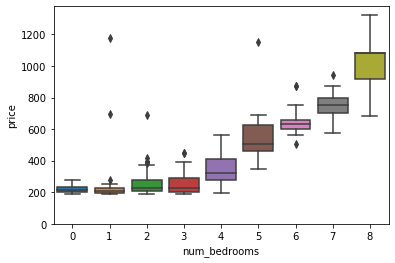

In [38]:
# Number of bedrooms as potential predictor variable of price
sns.boxplot(x="num_bedrooms", y="price", data=df)
plt.ylim(0,)

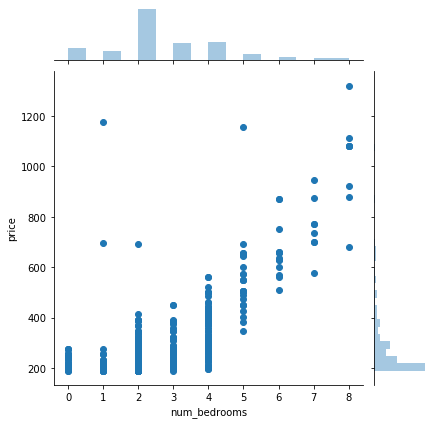

In [39]:
sns.jointplot(x='num_bedrooms', y='price', data=df[['num_bedrooms','price']])

##### What we see from these graphs is that (1) the price increases with the number of rooms, which is less surprising, and (2) that the rents for studios and 1-bedroom properties as well as for 2- and 3-bedrooms is relatively similar, respectively. 

##### ...As well as the possible correlation between number of bathrooms and price

(0, 1376.5)

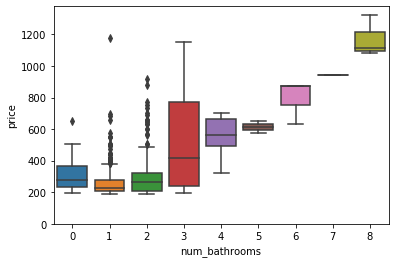

In [40]:
# Number of bedrooms as potential predictor variable of price
sns.boxplot(x="num_bathrooms", y="price", data=df)
plt.ylim(0,)

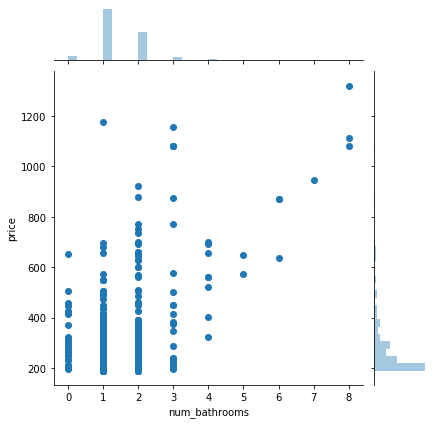

In [41]:
sns.jointplot(x='num_bathrooms', y='price', data=df[['num_bathrooms','price']])

##### We can see a similar trend as before, but it can also be seen that there is a wide spread in price for 1- and 2-bedrooms. 

##### Looking specifically at the properties in NG7, we can obtain the following information:

In [42]:
propsNG7.groupby('num_bedrooms').mean()

,num_bathrooms,price,latitude,longitude
num_bedrooms,,,,
0,0.916667,213.916667,52.948295,-1.161089
1,1.000000,279.714286,52.955004,-1.164514
2,1.224490,245.775510,52.957065,-1.166536
3,1.375000,275.625000,52.955976,-1.165223
4,1.666667,390.833333,52.951531,-1.171121
5,1.285714,496.000000,52.954720,-1.169403
6,2.000000,637.142857,52.953202,-1.173344
7,2.500000,726.250000,52.944968,-1.178832
8,2.000000,900.000000,52.955965,-1.166032


In [43]:
propsNG7.groupby('property_type').mean()

,num_bedrooms,num_bathrooms,price,latitude,longitude
property_type,,,,,
Detached house,4.800000,1.400000,581.200000,52.951643,-1.174670
End terrace house,5.000000,2.250000,539.000000,52.950382,-1.174797
Flat,2.080000,1.220000,250.860000,52.956329,-1.164947
Maisonette,2.000000,1.000000,294.000000,52.951046,-1.163956
Semi-detached house,3.428571,1.571429,381.857143,52.950154,-1.166745
Studio,0.000000,0.916667,213.916667,52.948295,-1.161089
Terraced house,4.363636,1.454545,467.909091,52.957256,-1.172732
Town house,4.000000,4.000000,322.000000,52.947530,-1.155853


### <b>5. Discussion</b>


##### A (late) disclaimer: this work is far from being perfect and completed. However, it allowed to gain some first insights into the properties for rent market in Nottingham, UK. While we managed to extract property data from Zoopla, which seemed very exhaustive and relatively complete, data from Foursquare is still a bit lacking. This is most likely due to the fact that Foursquare appears not to be well-known in Europe and people still tend to use Google as their preferred means of information gathering. The work can be enhanced by conducting a more thorough data analysis and apply some machine learning tools to the data. 

### <b>6. Conclusions</b>


##### This notebook presented the work that has been conducted for the Coursera course 'Applied Data Science Capstone' week 5. We looked at property data from Nottingham, UK and entertainments options with a particular focus on students. We covered some initial data pre-processing and analysis on data obtained through the Zoopla Developer API. The data were visualised using Python's Folium library and The Foursquare City Guide API was used to obtain some additional information for things to do in Nottingham especially when living in the postcode area around NG7.